In [10]:
from jeffutils.utils import reimport
from pprint import pprint
import json

from data_loader import *
reimport(["from data_loader import *"], globals())
reimport(["from experimenter import *"], globals())


# load settings
with open("config.json") as f:
    settings = json.load(f)
benchmark_models = settings["benchmark_models"]
benchmark_datasets = settings["benchmark_datasets"]
date_format = settings["date_format"]
repeat = settings["repeat"]
date_time = dt.datetime.now().strftime(date_format)


2 models 	['dl_softfold', 'dl_fold'] on
2 datasets 	['digits', 'fashionMNIST'] at 241108@1718

{'all_benchmark_datasets': ['digits',
                            'fashionMNIST',
                            'cancer',
                            'cifar10',
                            'imagenet'],
 'all_benchmark_models': ['randomforest',
                          'dl_control',
                          'dl_fold',
                          'dl_softfold',
                          'dl_cnn',
                          'dl_resnet',
                          'knn',
                          'metric'],
 'benchmark_datasets': ['digits', 'fashionMNIST'],
 'benchmark_models': ['dl_softfold', 'dl_fold'],
 'date_format': '%y%m%d@%H%M',
 'default_ratio_list': [0.1],
 'info_list': ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'time_list'],
 'info_titles': ['loss', 'loss', 'acc', 'acc', 'time'],
 'num_epochs': 75,
 'possible_models': ['randomforest',
                     'knn',
                    

Training: Epoch:75/75, Loss:0.0481: 100%|██████████| 75/75 [00:12<00:00,  6.22it/s]


Working Device: cpu


Training: Epoch:75/75, Loss:0.1293: 100%|██████████| 75/75 [00:12<00:00,  5.91it/s]


Working Device: cpu


Training: Epoch:75/75, Loss:0.0523: 100%|██████████| 75/75 [00:08<00:00,  8.52it/s]


Testing dl_fold on digits
	X shape:  (1437, 64)
	y shape:  (1437,)
Working Device: cpu


Training: Epoch:75/75, Loss:0.0420: 100%|██████████| 75/75 [00:05<00:00, 12.58it/s]


Working Device: cpu


Training: Epoch:75/75, Loss:0.0683: 100%|██████████| 75/75 [00:05<00:00, 13.13it/s]


Working Device: cpu


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


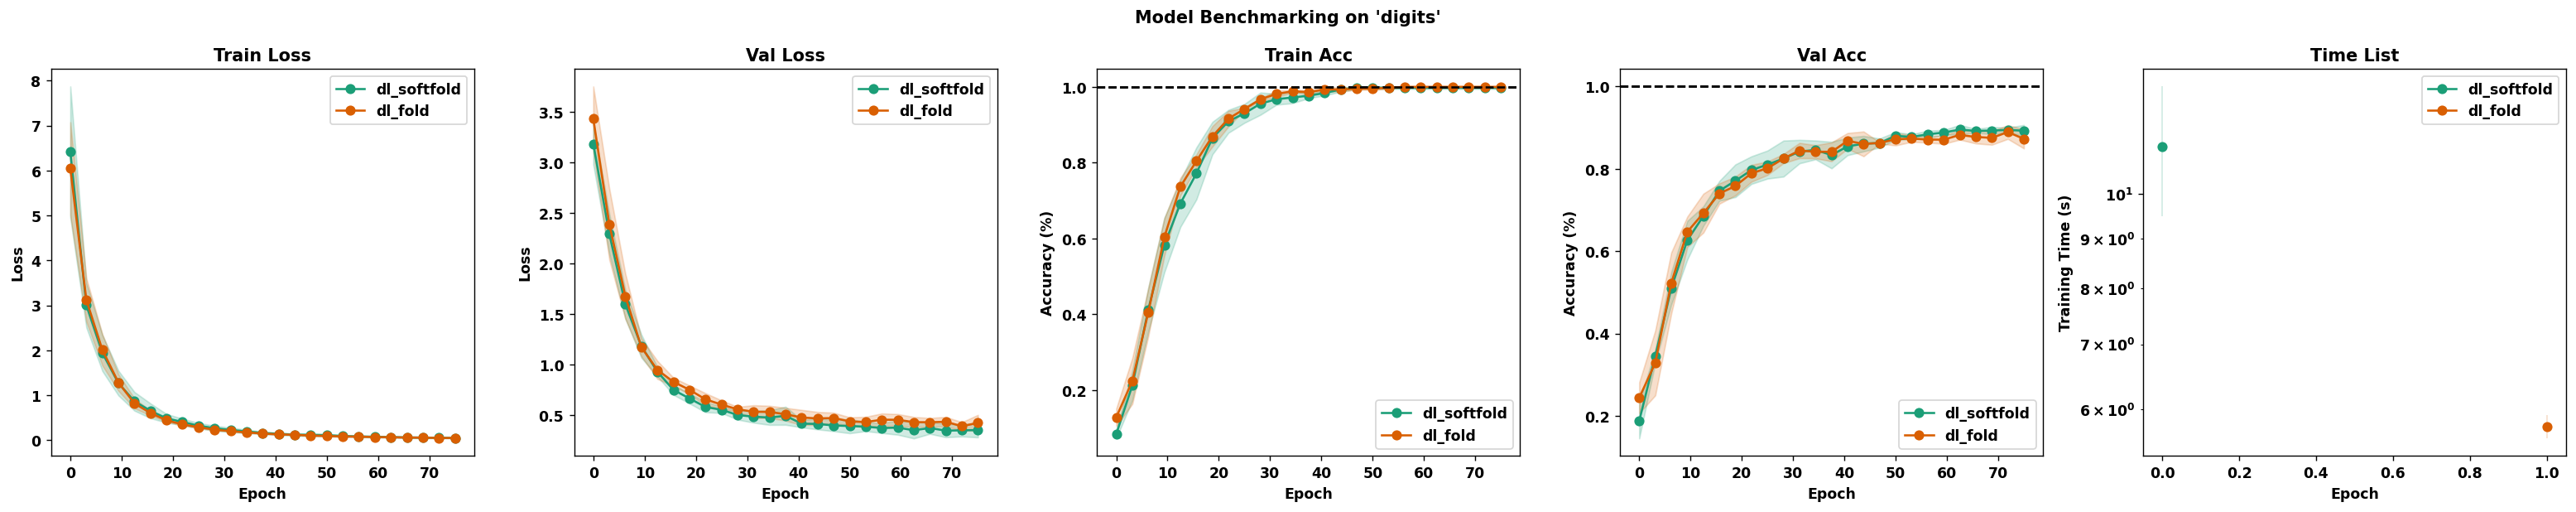

Testing dl_softfold on fashionMNIST


c:\Users\dalli\source\repos\FoldAndCutNetworks\BenchmarkTests\data_loader.py:189: UserWarning:

random_state is not implemented for this dataset, ignoring the provided value.



	X shape:  (60000, 784)
	y shape:  (60000,)
Working Device: cpu


Training: Epoch:75/75, Loss:2.8410: 100%|██████████| 75/75 [03:32<00:00,  2.84s/it] 


Made a new directory results/fashionMNIST/dl_softfold/npy_files
Working Device: cpu


Training: Epoch:75/75, Loss:13.4794: 100%|██████████| 75/75 [03:30<00:00,  2.81s/it]


Working Device: cpu


Training: Epoch:75/75, Loss:8.0466: 100%|██████████| 75/75 [03:36<00:00,  2.89s/it] 


Testing dl_fold on fashionMNIST
	X shape:  (60000, 784)
	y shape:  (60000,)
Working Device: cpu


Training: Epoch:75/75, Loss:7.5068: 100%|██████████| 75/75 [02:48<00:00,  2.25s/it] 


Working Device: cpu


Training: Epoch:75/75, Loss:9.5463: 100%|██████████| 75/75 [02:25<00:00,  1.94s/it] 


Working Device: cpu


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


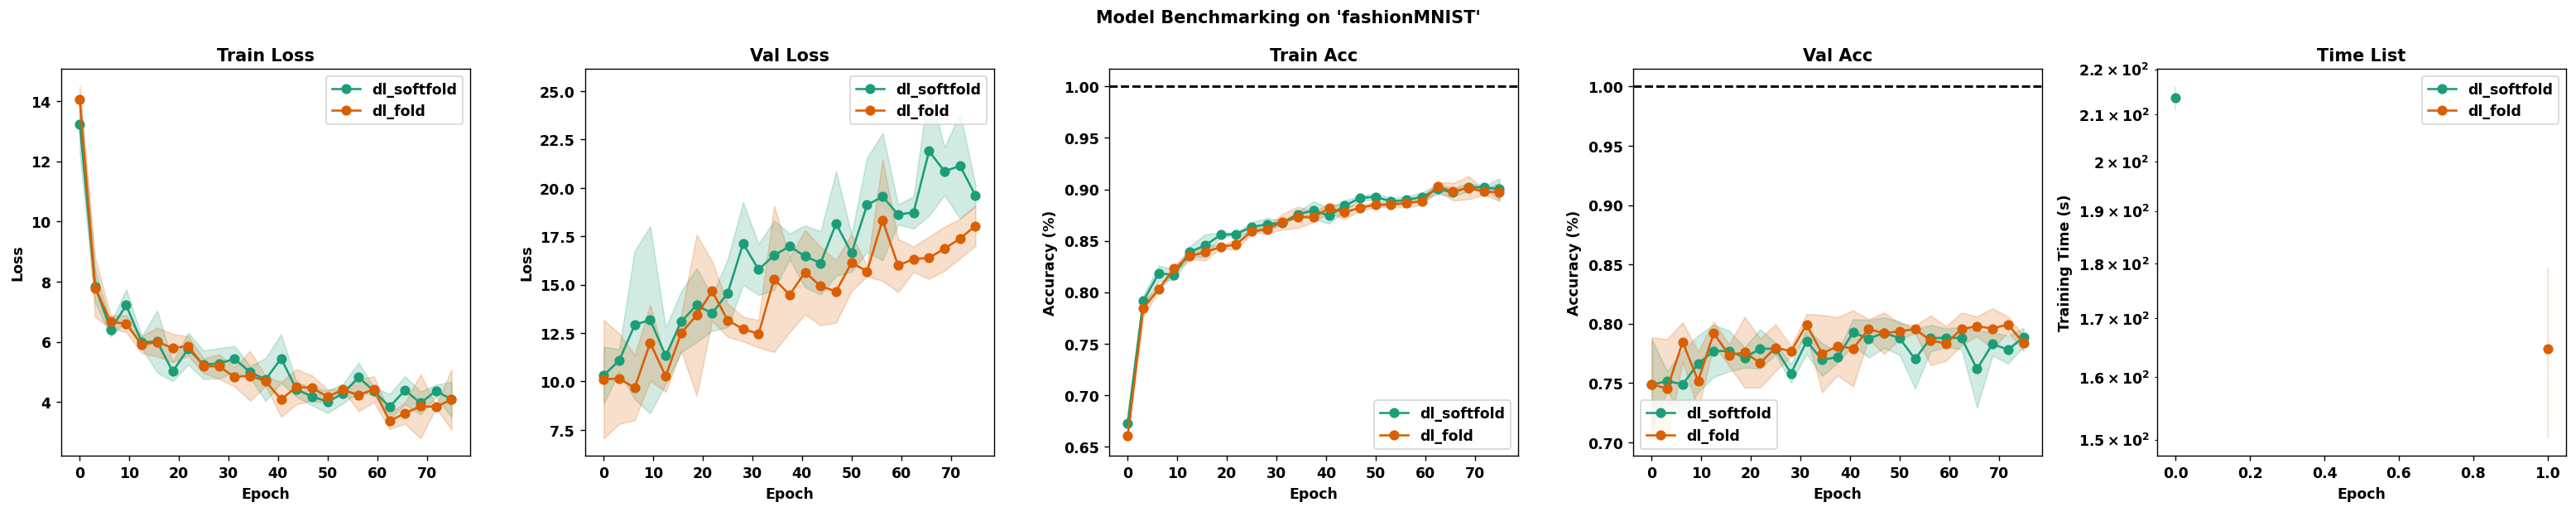

In [11]:
test_results = {}
verbose = 2
new_set = False

if new_set:
    date_time = dt.datetime.now().strftime(date_format)

if verbose > 0:
    print(f"{len(benchmark_models)} models \t{benchmark_models} on")
    print(f"{len(benchmark_datasets)} datasets \t{benchmark_datasets} at {date_time}\n")
if verbose > 1:
    pprint(settings)

for dataset_name in benchmark_datasets:
    test_results[dataset_name] = {}
    for model_name in benchmark_models:
        try:
            results, sizes = test_model(model_name, date_time, dataset_name, 
                                        return_sizes=True, repeat=repeat, verbose=verbose)
            test_results[dataset_name].update(results)
        except InvalidModelError as e:
            print(f"Error: {e}")
            print(f"Skipping {model_name} on {dataset_name}")
            continue
    constants = (sizes, date_time, dataset_name)
    plot_results(test_results[dataset_name], constants, repeat=repeat,
                 save_fig=True, replace_fig=True, from_data=False, errors='flag')

100%|██████████| 5/5 [00:01<00:00,  3.84it/s]


Saving your figure...


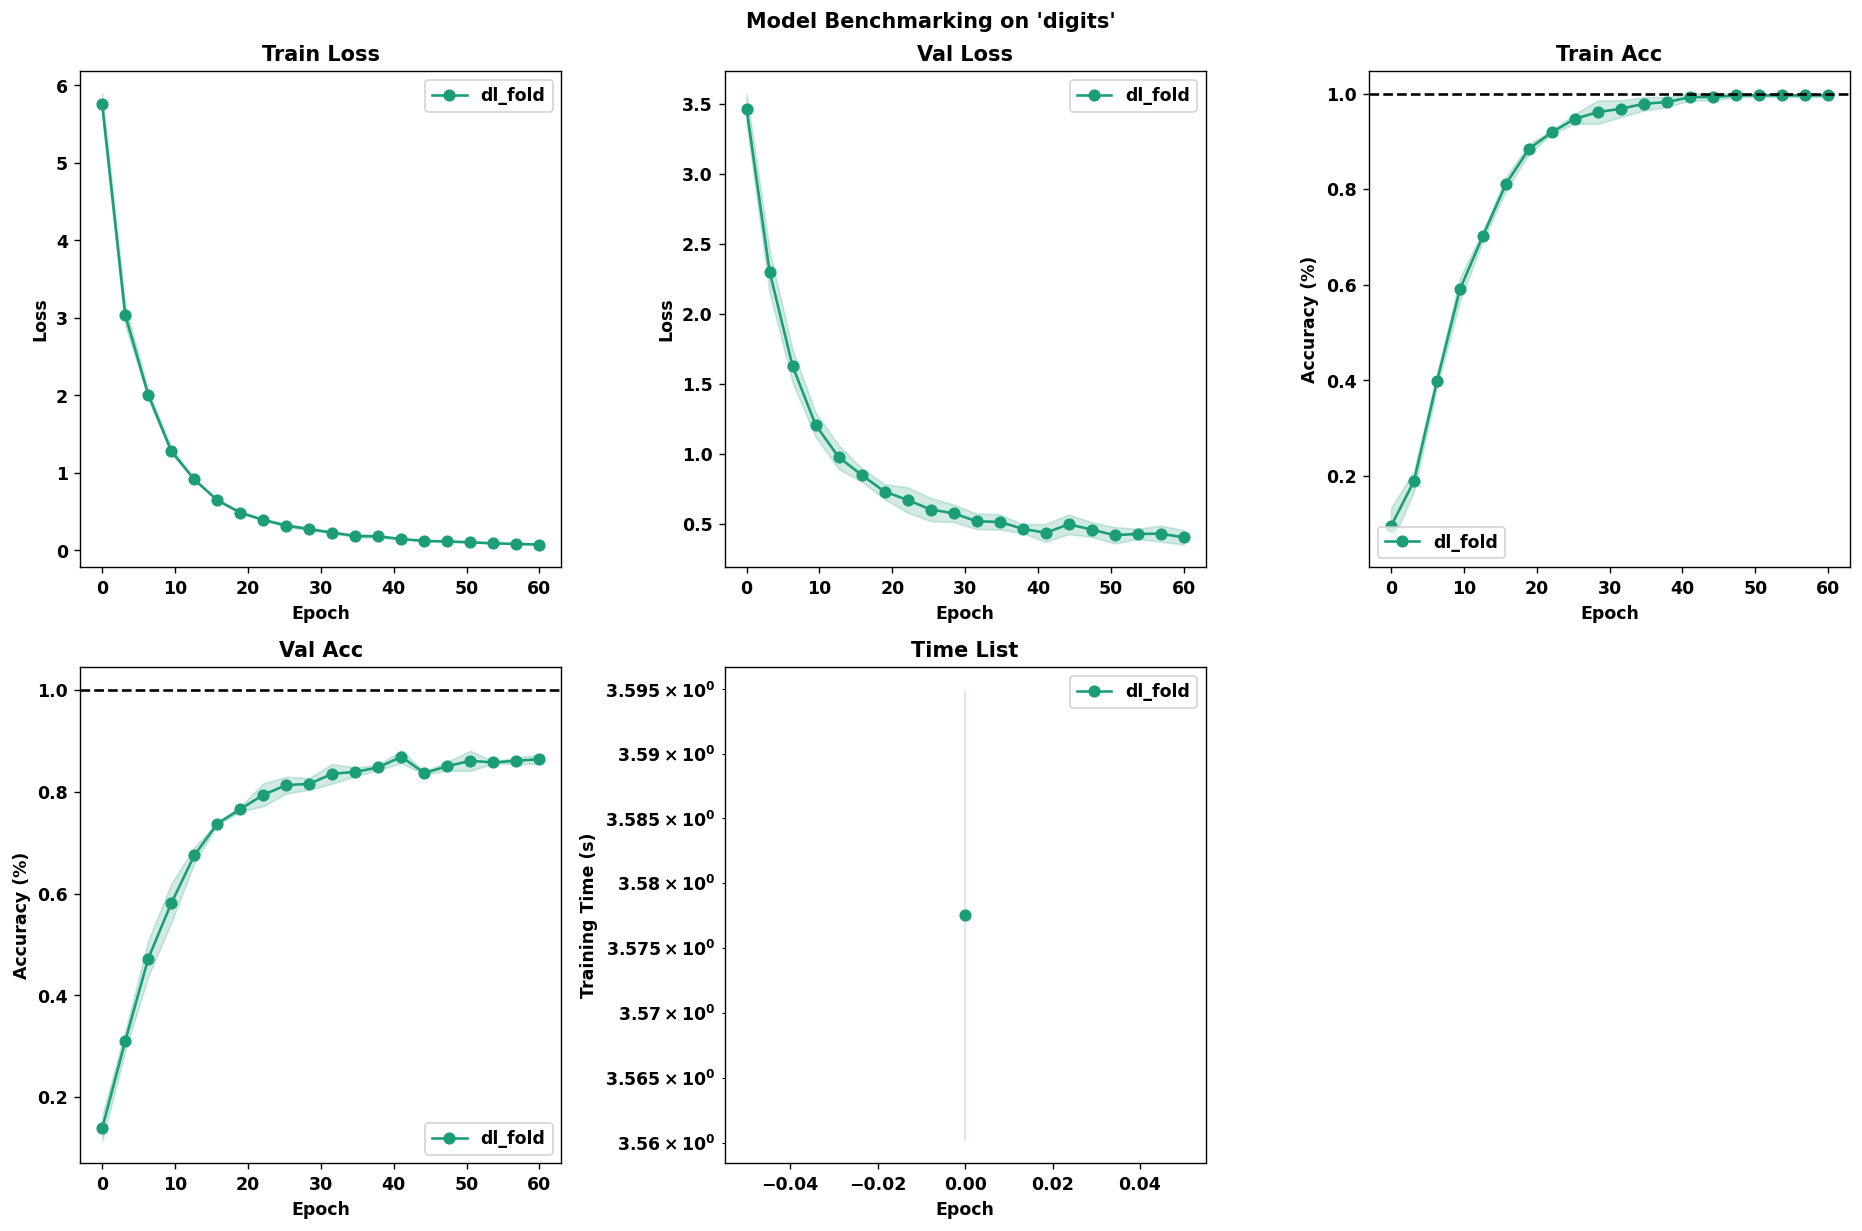

In [9]:
reimport(["from experimenter import *"], globals())
plot_results(test_results[dataset_name], constants, repeat=repeat,
                 save_fig=True, replace_fig=True, from_data=False, errors='flag', rows=2, verbose=1)